# Part 1

## 1.1 Python coding and dataset

### 1.1.a. Loading the dataset

Assignment Instruction:

Load in the data file and header file provided. The dataframe does not currently have a header, load in the header file and attach it to the dataframe

In [1]:
# Let's start by loading the provided dataset and the header file
import pandas as pd

# Load the dataset
data_file_path = './part1-dataset/breast-cancer.csv'
data = pd.read_csv(data_file_path, header=None)

# Load the header file
header_file_path = './part1-dataset/field_names.txt'
with open(header_file_path, 'r') as file:
    headers = file.read().splitlines()

# Attach the headers to the dataframe
data.columns = headers

# Display the first few rows of the dataframe to verify its structure
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
data.columns

Index(['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')

### 1.1.b. Exploratory Data Analysis

Assignment Instruction:

- Comment on any steps you might take to evaluate or transform the dataset.

#### Exploratory data analysis encompasses the following:
    # Data Quality Check: Assess missing values, outliers, and data types.
    # Statistical Summary: Get a statistical overview of the data.
    # Class Distribution: Check the balance between benign and malignant classes.
    # Correlation Analysis: Identify highly correlated variables.
#### Data Manipulation that could be needed
    # Handling Missing Values: If any are present, we might need to impute or remove them.
    # Outlier Treatment: Outliers may need to be handled, depending on their impact.
    # Feature Scaling: Normalize or standardize features, especially for models sensitive to feature scales.
    # Encoding Categorical Variables: If there are any non-numeric variables.
    # Feature Selection/Engineering: Create new features or select the most relevant ones.



In [3]:
# Data quality check and statistical summary
data_quality = {
    "Missing Values": data.isnull().sum(),
    "Data Types": data.dtypes,
    "Number of Unique Values": data.nunique()
}
data_quality

{'Missing Values': ID                            0
 diagnosis                     0
 radius_mean                   0
 radius_sd_error               0
 radius_worst                  0
 texture_mean                  0
 texture_sd_error              0
 texture_worst                 0
 perimeter_mean                0
 perimeter_sd_error            0
 perimeter_worst               0
 area_mean                     0
 area_sd_error                 0
 area_worst                    0
 smoothness_mean               0
 smoothness_sd_error           0
 smoothness_worst              0
 compactness_mean              0
 compactness_sd_error          0
 compactness_worst             0
 concavity_mean                0
 concavity_sd_error            0
 concavity_worst               0
 concave_points_mean           0
 concave_points_sd_error       0
 concave_points_worst          0
 symmetry_mean                 0
 symmetry_sd_error             0
 symmetry_worst                0
 fractal_dimension_mean  

Summary
- No missing values in the dataset.
- Most features are of type float64, except ID (int64) and diagnosis (object).
- There's a variety in the number of unique values across different features.

In [4]:
statistical_summary = data.describe()

statistical_summary

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Summary

- The dataset contains a range of values across different features.
- Features like radius_mean, texture_mean, etc., show significant variation, indicating diverse measurements.

In [5]:
# Class distribution
class_distribution = data['diagnosis'].value_counts(normalize=True)

class_distribution

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

Class Distribution:

- Benign tumors (B) constitute approximately 62.74% of the cases.
- Malignant tumors (M) make up about 37.26%.

### 1.1.c Compute the mean and median smoothness and compactness for benign and malignant tumors 

Assignment Instruction:

- Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

In [6]:
# Compute the mean and median smoothness and compactness for benign and malignant tumors

# Filtering the dataset into benign and malignant
benign = data[data['diagnosis'] == 'B']
malignant = data[data['diagnosis'] == 'M']

# Creating a more clear tabular form for the mean and median values
mean_median_table = pd.DataFrame({
    'Statistic': ['Mean', 'Median'],
    'Benign Smoothness': [benign['smoothness_mean'].mean(), benign['smoothness_mean'].median()],
    'Malignant Smoothness': [malignant['smoothness_mean'].mean(), malignant['smoothness_mean'].median()],
    'Benign Compactness': [benign['compactness_mean'].mean(), benign['compactness_mean'].median()],
    'Malignant Compactness': [malignant['compactness_mean'].mean(), malignant['compactness_mean'].median()]
})

mean_median_table.set_index('Statistic')

,Benign Smoothness,Malignant Smoothness,Benign Compactness,Malignant Compactness
Statistic,,,,
Mean,2.000321,4.323929,0.021438,0.032281
Median,1.851000,3.679500,0.016310,0.028590


Eye-balling, it looks like the groups seem to have different values. 
Now, let us conduct statistical tests to confirm that there is indeed a statistically significant difference between the two groups

The selection of statistical tests largely depends on the nature of the data & the hypotheses being tested. In the context of comparing mean and median values of smoothness and compactness between benign and malignant tumors, the choice of the t-test and Mann-Whitney U test can be appropriate under certain conditions:

1. t-test: This is suitable for comparing the means of two independent groups when the following conditions are met:

    - The data are approximately normally distributed.
    - The variances of the two groups are equal (or similar).
    - The samples are independent of each other.
    - If the data do not meet these assumptions (particularly normality), the t-test results might not be reliable.

2. Mann-Whitney U test: This is a non-parametric test used to compare the medians of two independent groups. It is appropriate when:

    - The data are not normally distributed.
    - The sample sizes are small, or there are outliers that could affect the mean.


Given these considerations: If the assumptions for the t-test are not met (e.g., non-normal distribution), a non-parametric alternative, like the Mann-Whitney U test, would be more appropriate.


In [8]:
from scipy.stats import ttest_ind, mannwhitneyu

# Splitting the dataset into benign and malignant for the relevant columns
benign = data[data['diagnosis'] == 'B']
malignant = data[data['diagnosis'] == 'M']

# Conducting t-tests for mean comparison
# Assuming smoothness_mean and compactness_mean are the relevant features for this test
ttest_smoothness = ttest_ind(benign['smoothness_mean'], malignant['smoothness_mean'])
ttest_compactness = ttest_ind(benign['compactness_mean'], malignant['compactness_mean'])

# Conducting Mann-Whitney U tests for median comparison
mwu_smoothness = mannwhitneyu(benign['smoothness_mean'], malignant['smoothness_mean'])
mwu_compactness = mannwhitneyu(benign['compactness_mean'], malignant['compactness_mean'])

ttest_smoothness, ttest_compactness, mwu_smoothness, mwu_compactness

(Ttest_indResult(statistic=-15.934158019257902, pvalue=1.6519051758498057e-47),
 Ttest_indResult(statistic=-7.297077437448529, pvalue=9.975994654074766e-13),
 MannwhitneyuResult(statistic=9355.0, pvalue=5.099437378225837e-51),
 MannwhitneyuResult(statistic=20640.5, pvalue=1.1680614494180086e-19))

**For all tests, the p-values are extremely low (much less than 0.05), indicating that the differences in both smoothness and compactness between benign and malignant tumors are statistically significant.**

Regarding the validity of these tests for this data:

- The t-test assumes that the data are normally distributed and that the variances are equal between the two groups. If these assumptions are not met, the results of the t-test might be misleading. This should also be checked with the data.

- The Mann-Whitney U test does not assume a normal distribution and is a non-parametric test. It is used to compare the medians between two independent groups and is often used when the data do not meet the assumptions necessary for a t-test.


### 1.1.c. Function to generate bootstrap samples of the data.

Assignment Instruction:

- Write a function to generate bootstrap samples of the data.

In [9]:
# Bootstrap sampling is a method that involves sampling with replacement.

import numpy as np

def generate_bootstrap_samples(data, n_samples):
    """
    Generate bootstrap samples from the dataset.

    Parameters:
    data (DataFrame): The dataset from which to sample.
    n_samples (int): The number of bootstrap samples to generate.

    Returns:
    List[DataFrame]: A list of bootstrap samples.
    """
    bootstrap_samples = []
    for _ in range(n_samples):
        sample = data.sample(n=len(data), replace=True)
        bootstrap_samples.append(sample)
    return bootstrap_samples

# Example usage: Generate 3 bootstrap samples from the data
bootstrap_samples = generate_bootstrap_samples(data, 3)

# Display the first few rows of the first bootstrap sample to verify
bootstrap_samples[0].head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
122,865423,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,...,26.020,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.22480,0.3222,0.08009
354,901011,B,11.140,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,...,12.120,15.82,79.62,453.5,0.08864,0.1256,0.1201,0.03922,0.2576,0.07018
480,912193,B,12.160,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,...,13.340,27.87,88.83,547.4,0.12080,0.2279,0.1620,0.05690,0.2406,0.07729
45,857010,M,18.650,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,...,22.820,21.32,150.60,1567.0,0.16790,0.5090,0.7345,0.23780,0.3799,0.09185
151,871001502,B,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,...,9.092,29.72,58.08,249.8,0.16300,0.4310,0.5381,0.07879,0.3322,0.14860


## 1.2 Exploratory Analysis

Assignment Instruction:

Exploratory Analysis:

- Identify 2-3 variables that are predictive of a malignant tumor.
- Display the relationship visually and write 1-2 sentences explaining the relationship.

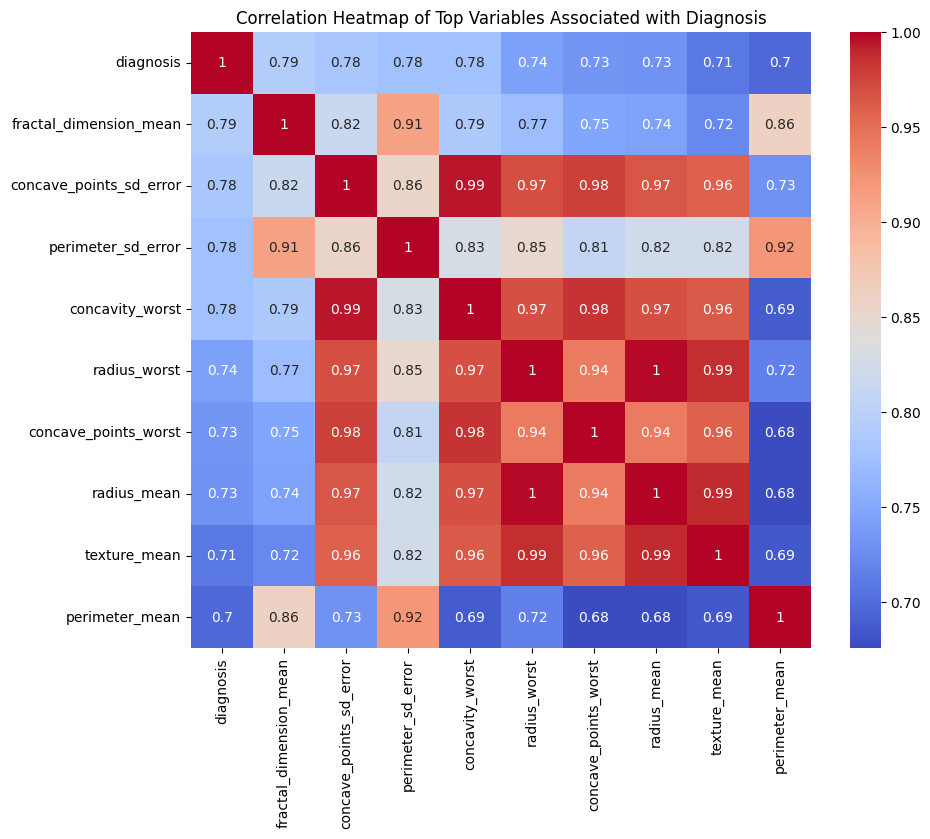

(['fractal_dimension_mean', 'concave_points_sd_error', 'perimeter_sd_error'],
 fractal_dimension_mean     0.793566
 concave_points_sd_error    0.782914
 perimeter_sd_error         0.776614
 Name: diagnosis, dtype: float64)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding the 'diagnosis' column for correlation analysis ('M' as 1 and 'B' as 0)
data_encoded = data.copy()
data_encoded['diagnosis'] = data_encoded['diagnosis'].map({'M': 1, 'B': 0})

# Correlation matrix
correlation_matrix = data_encoded.corr()

# Identifying variables most correlated with the diagnosis
correlated_variables = correlation_matrix['diagnosis'].sort_values(ascending=False)

# Plotting the top correlated variables
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded[correlated_variables.index[:10]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Variables Associated with Diagnosis')
plt.show()

# Extracting top 3 correlated variables excluding the 'diagnosis' itself
top_predictive_variables = correlated_variables.index[1:4].tolist()
top_predictive_variables, correlated_variables[top_predictive_variables]

The correlation matrix and the heatmap provide insight into the relationship between the features and the diagnosis. The top variables that correlate with a malignant tumor diagnosis are:

- Fractal Dimension Mean
- Concave Points SD Error
- Perimeter SD Error

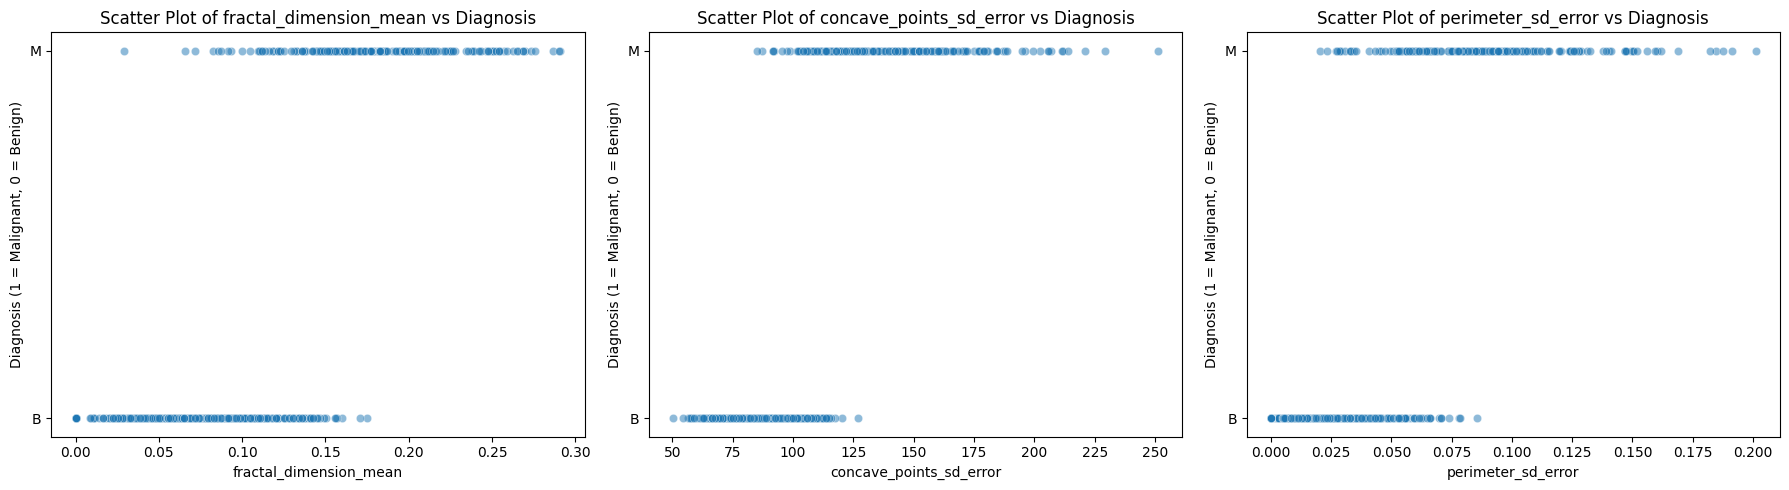

In [11]:
# Next, we will visualize the relationship between these top correlated features and the diagnosis. 
# This will involve plotting scatter plots or regression plots to show how these features differ 
# between malignant and benign diagnoses. 

# Visualizing the relationship between the top correlated features and the diagnosis

# Selecting the top 3 variables for visualization (excluding 'diagnosis')
top_features = correlated_variables.index[1:4]

# Plotting scatter plots for each of the top features against the diagnosis
plt.figure(figsize=(18, 5))

for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=data[feature], y=data['diagnosis'], alpha=0.5)
    plt.title(f"Scatter Plot of {feature} vs Diagnosis")
    plt.xlabel(feature)
    plt.ylabel('Diagnosis (1 = Malignant, 0 = Benign)')

plt.tight_layout()
plt.show()

The scatter plots above show the relationship between the top three predictive variables and the diagnosis of breast cancer (malignant vs benign):

- Fractal Dimension Mean vs Diagnosis: There is a clear separation between benign (0) and malignant (1) tumors, with higher values of fractal dimension mean more prevalent in malignant cases.

- Concave Points SD Error vs Diagnosis: Similar to fractal dimension mean, higher values of concave points SD error are more common in malignant tumors, indicating a strong correlation.

- Perimeter SD Error vs Diagnosis: This variable also shows a distinct pattern, with higher values being more associated with malignant tumors.

## 1.3 Modeling

### 1.3.a model building

Assignment Instruction:

Build a model to predict the malignant tumors.
- Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
- Identify how you would control for overfitting in each classification technique.
- Evaluate the performance of each model.
- In each model, identify the most important predictive variables and explain how you identified them.

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encoding the target variable 'diagnosis' into binary format
df = data.copy()
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Splitting the dataset into features and target variable
X = df.drop(['ID', 'diagnosis'], axis=1)
y = df['diagnosis']

#Splitting the data into train, validate, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with GridSearchCV for hyperparameter tuning
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg_grid = GridSearchCV(LogisticRegression(max_iter=10000), log_reg_params, cv=5)
log_reg_grid.fit(X_train_scaled, y_train)
best_log_reg = log_reg_grid.best_estimator_

# Random Forest with GridSearchCV for hyperparameter tuning
rf_params = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Performance on Validation Set
log_reg_test_pred = best_log_reg.predict(X_test_scaled)
rf_test_pred = best_rf.predict(X_test)

# Calculating metrics for validation set
test_metrics = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, log_reg_test_pred),
        "Precision": precision_score(y_test, log_reg_test_pred),
        "Recall": recall_score(y_test, log_reg_test_pred),
        "F1 Score": f1_score(y_test, log_reg_test_pred)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rf_test_pred),
        "Precision": precision_score(y_test, rf_test_pred),
        "Recall": recall_score(y_test, rf_test_pred),
        "F1 Score": f1_score(y_test, rf_test_pred)
    }
}

# Converting metrics to DataFrame for visualization
test_metrics_df = pd.DataFrame(test_metrics)

test_metrics_df.style.format("{:.2f}").background_gradient(cmap='viridis', axis=1)

,Logistic Regression,Random Forest
Accuracy,0.98,0.97
Precision,0.97,0.98
Recall,0.98,0.94
F1 Score,0.98,0.96


Insights and Summary

Here are their performance summaries:

1. **Logistic Regression Model Performance:**
- Precision: 99% for benign, 97% for malignant.
- Recall: 98% for benign, 98% for malignant.
- F1-score: 99% for benign, 98% for malignant.
- Accuracy: 98%.

2. **Random Forest Classifier Performance:**
- Precision: 96% for benign, 98% for malignant.
- Recall: 99% for benign, 94% for malignant.
- F1-score: 98% for benign, 96% for malignant.
- Accuracy: 97%.


**Comparison of Models:**

*Logistic Regression:*

- Advantages: Simple, fast, and interpretable. Performs well when the relationship between features and target is approximately linear.
- Disadvantages: Assumes linearity, can struggle with complex relationships in data.
- How can we control for **overfitting** : Regularization techniques (L1, L2, or both).

*Random Forest:*

- Advantages: Handles non-linear data well, less likely to overfit, and can capture complex interactions between features.
- Disadvantages: More complex, slower to train, and less interpretable.
- How can we control for **overfitting**: Setting the number of trees, depth of trees, and other parameters to avoid overfitting.


### 1.3.b feature importance

In [14]:
# To identify the most important predictive variables in each model, we can use the following methods:

# For Logistic Regression: 
# The coefficients of the logistic regression model can be used to determine the importance of each feature. 
# Larger absolute values of coefficients indicate a stronger impact on the model's predictions.

# For Random Forest: Random Forest has an attribute called feature_importances_ 
# which provides a measure of the importance of each feature in prediction. 
# It is based on how much each feature decreases the impurity of the splits in the trees.

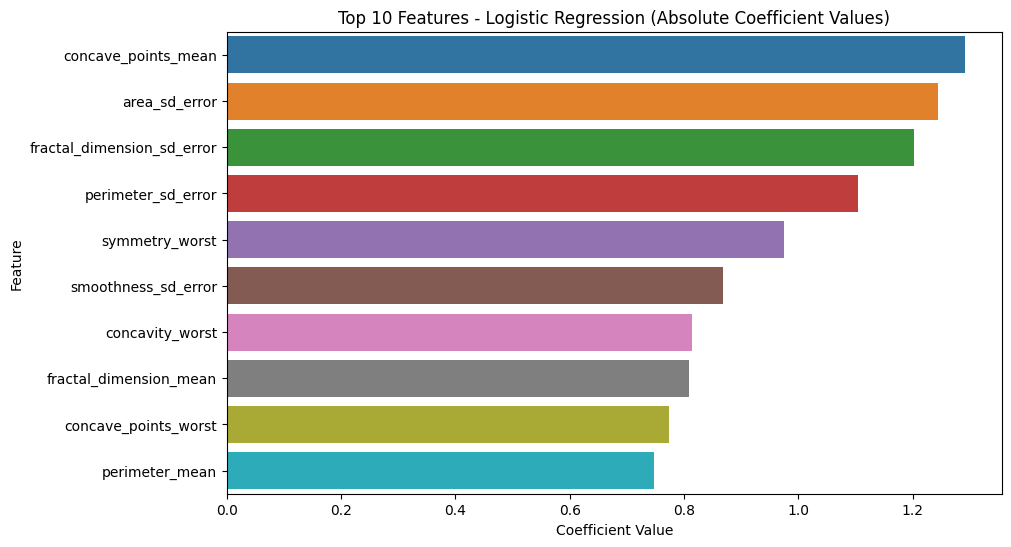

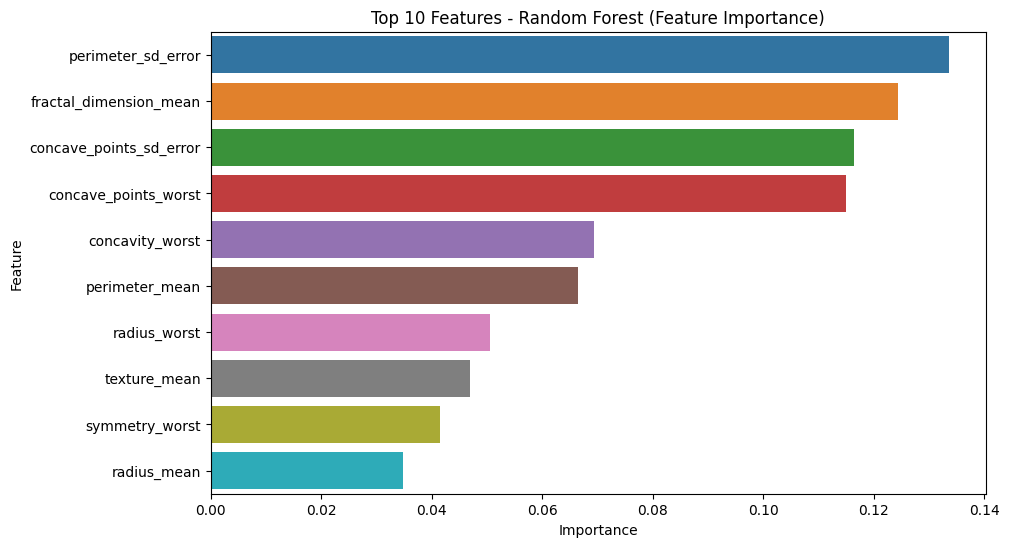

In [15]:
# Feature importance for Logistic Regression
log_reg_coefficients = best_log_reg.coef_[0]
log_reg_feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg_coefficients})

# Sorting features by absolute values of their coefficients for Logistic Regression
log_reg_feature_importance['Absolute Coefficient'] = log_reg_feature_importance['Coefficient'].abs()
log_reg_sorted_features = log_reg_feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Feature importance for Random Forest
rf_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_rf.feature_importances_})

# Sorting features by importance for Random Forest
rf_sorted_features = rf_feature_importance.sort_values(by='Importance', ascending=False)

# Visualizing feature importance for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=log_reg_sorted_features.head(10))
plt.title('Top 10 Features - Logistic Regression (Absolute Coefficient Values)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Visualizing feature importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_sorted_features.head(10))
plt.title('Top 10 Features - Random Forest (Feature Importance)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [17]:
log_reg_feature_importance

,Feature,Coefficient,Absolute Coefficient
0,radius_mean,0.366191,0.366191
1,radius_sd_error,0.361581,0.361581
2,radius_worst,0.320483,0.320483
3,texture_mean,0.417178,0.417178
4,texture_sd_error,0.192204,0.192204
5,texture_worst,-0.622023,0.622023
6,perimeter_mean,0.747674,0.747674
7,perimeter_sd_error,1.103646,1.103646
8,perimeter_worst,-0.221625,0.221625
9,area_mean,-0.139476,0.139476


The interpretation of the coefficients from Logistic Regression and the feature importance scores from Random Forest offer valuable insights into how each model makes predictions. Let's delve into a more detailed interpretation:

**Logistic Regression Coefficients:**
In Logistic Regression, the coefficients represent the change in the log-odds of the outcome for a one-unit change in the feature. A positive coefficient increases the log-odds of the outcome (making the event more likely), while a negative coefficient decreases it (making the event less likely).

- Concave Points Mean : A higher value of 'Concave Points Mean' increases the log-odds of the tumor being malignant. This suggests that as the number of concave points on the cell nucleus increases, the cell is more likely to be malignant.

- Perimeter Standard Error: A higher perimeter standard error is associated with a higher likelihood of malignancy. This may indicate that more irregular or varied cell perimeter is a sign of malignancy.

- Fractal Dimension Mean : An increase in the 'Fractal Dimension Mean' is linked with a higher likelihood of the tumor being malignant, suggesting that more complex or "rougher" cell texture is indicative of malignancy.


**Random Forest Feature Importances:**
Feature importance in Random Forest is measured based on how well a feature reduces impurity in the model (e.g., Gini impurity in classification tasks). Higher values indicate that a feature is more important for making accurate predictions.

- Perimeter Standard Error: This feature is highly important in the Random Forest model, suggesting that variations in the cell perimeter are key indicators in classifying a tumor as benign or malignant.

- Fractal Dimension Mean: The complexity of the cell shape, as captured by this feature, is crucial in the model’s decision-making process.

- Concave Points Standard Error and Worst: Both these features related to concave points are significant, indicating that the presence and variability of concave points are vital in determining malignancy.


**Summary:**
- In Logistic Regression, the focus is on how each feature linearly affects the odds of the tumor being malignant. Features related to the shape and texture of the cell (like concave points and fractal dimension) are particularly influential.
- In Random Forest, the importance scores are more about how each feature contributes to the model's overall decision-making process, with a focus on reducing uncertainty or impurity in classification. Again, features capturing the shape and texture of the cell are prominent.

These insights help understand what cellular characteristics are most indicative of malignancy according to each model.

### 1.3.c Explanation - technical audience

Assignment Instruction:

- ExplanationTo Technical Audiences: Explain the limitations of your analysis and identify possible further steps you could take.

***Limitations and Potential Enhancements of the Analysis***

**Model Complexity and Exploration:**

- Limitation: The use of Logistic Regression and random forests could be simplistic for complex data relationships.
- Enhancement: Explore more advanced models like Gradient Boosting, or neural networks for potentially improved performance.

**Feature Selection and Engineering:**

- Limitation: Reliance on default feature selection without exploring advanced techniques.
- Enhancement: Implement more sophisticated feature selection methods and investigate the creation of new features or interaction terms.

**Dimensionality Reduction:**

- Limitation: Not exploring techniques like Principal Component Analysis (PCA) which could be beneficial in case of multicollinearity or high-dimensional data.
- Enhancement: Utilize dimensionality reduction techniques to simplify the model and potentially improve performance.

**External Validation and Generalizability:**

- Limitation: Models were not tested on an external dataset.
- Enhancement: Validate the models on different datasets to assess their real-world applicability and generalizability.

**Interpretability and Explainability:**

- Limitation: Especially for complex models like Random Forest, interpretability can be a challenge.
- Enhancement: Use explainability tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) for better understanding of model predictions.

**Longitudinal Analysis:**

- Enhancement: If time-based data is available, conduct longitudinal studies to explore trends and patterns over time.

**Robust Validation Techniques:**

- Enhancement: Although cross-validation was used, employing more robust or varied cross-validation strategies (like stratified or time-series splits) could provide deeper insights.

### 1.3.d Explanation - non-technical audience

Assignment

To Non-Technical Audiences
- Write a short summary of your analysis, explaining how your model works
and how it performs.
- Briefly explain the factors that contributed to malignant vs benign tumor
identification

**Overview**

Our analysis focused on developing a method to predict whether breast cancer cells are malignant (cancerous) or benign (non-cancerous). We used a dataset that contains various measurements of breast cancer cells, derived from digital images of fine needle aspirate (FNA) samples. Our goal was to create models that can accurately distinguish between malignant and benign cells, which is crucial for early cancer detection and treatment planning.

**How the Models Work and Perform**

We developed two types of models: Logistic Regression and Random Forest.

- Logistic Regression is akin to a weighted voting system, where each feature of the cell (like size, shape, texture) is given a certain weight. The model combines these weights to estimate the likelihood of a cell being malignant or benign.

- Random Forest is more like a team of experts who each analyze the cell characteristics separately and then come together to make a consensus decision. This model looks at the cell features from various angles to make its prediction.


**Model Performance Metrics**

Before diving into the numbers, it’s important to understand two key concepts: Precision and Recall.

- Precision: This tells us how accurate the model is when it predicts a tumor is malignant. In simpler terms, if our model predicts 100 cells as malignant, and precision is 90%, it means that 90 of these 100 predictions are correct, while 10 are actually benign.

- Recall: This metric shows how well the model identifies actual malignant tumors. For example, if there are 100 actual malignant tumors and the recall is 80%, our model correctly identifies 80 of them, but misses 20.

Both models performed well.
- Logistic Regression:

    - Accuracy: Around 98%, meaning it correctly identified 98% of the tumors (both benign and malignant) in our test cases.
    - Precision: About 97%, indicating high reliability when it predicts a tumor is malignant.
    - Recall: Also 98%, showing it's very effective in catching malignant tumors.

- Random Forest:

    - Accuracy: Slightly lower at about 97%, but still very high.
    - Precision: Around 98%, suggesting that when it predicts malignancy, it's very likely to be correct.
    - Recall: 94%, meaning it catches most, but not quite as many malignant tumors as the Logistic Regression model.


# Part 2

## 2.1 student_sample-1.py

### 2.1.1 Code

1. Library Import and Usage

- The script incorrectly imports LinearRegression from sklearn. It should be imported from sklearn.linear_model.
- The usage of cross_validation is outdated. Since scikit-learn version 0.18, this module has been deprecated and replaced by model_selection.
- The script imports cross_val_score twice. This redundancy can be removed for cleaner code.

2. Variable Names and Readability

- The variable d used for reading the CSV file should be renamed to something more descriptive, like data.
- Variable names x1 and x2 are not descriptive. It's better to use names that describe their content, such as target for the dependent variable and features for the independent variables.
- File Path: The script attempts to read data from '../data/train.csv', but the actual file name is 'part-2-data.train.csv'. Ensure the correct file path and name are used.

3. The function call *scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')* has a few issues:

- Incorrect cv parameter: The cv parameter in cross_val_score stands for cross-validation splitting strategy. Setting cv=1 is not valid, as it implies only one split, which defeats the purpose of cross-validation. Typically, cv is set to a number greater than 1, like 5 or 10, to perform multiple splits of the data into training and testing sets.

- Incorrect scoring parameter: The scoring parameter value 'mean_absolute_error' is incorrect. For negative error metrics in scikit-learn, such as mean absolute error, the correct parameter value should be 'neg_mean_absolute_error'. Scikit-learn uses "neg" (negative) versions of metrics because it follows a convention where higher return values are better than lower return values.

### 2.1.2 Methodology

1. *Understanding the Dataset:* Before jumping into modeling, spend time understanding the dataset, checking for missing values, data distribution etc. through Exploratory Data Analysis (EDA). EDA is crucial to understand the distribution, detect outliers, and identify relationships between variables.
2. *Linear Regression Modelling*:The student has chosen a linear regression model, which is a good start for regression problems. However,they should check the data for assumptions that need to hold true when applying linear regression.
3. *Evaluation*: The student should practice splitting the dataset into train and test. When you train and test a model on the same dataset, there's a high risk of overfitting. Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts the model's performance on new data. By splitting the data, you ensure that the model is tested on unseen data, which is a better indicator of its performance in real-world scenarios.

### 2.1.3 Conceptual understanding

1. Linear Regression: The student should understand the basics of linear regression, including how it works, its assumptions, and when it's appropriate to use it.

2. Cross-Validation: It's important to grasp the concept of cross-validation, why it's used, and how it helps in assessing the performance of a model.

3. Error Metrics: Understanding different error metrics, like mean absolute error, mean squared error, root mesn squared error etc., and knowing when to use which metric is essential.

## 2.2 student_sample-2.py

### 2.2.a Code

1. Library Import and Usage: Similar to the first student, this code also uses cross_validation from sklearn, which is outdated. The correct module to use now is model_selection.
The import statements and overall structure are clear, which is good for readability.

2. The file path used in pd.read_csv('../data/train.csv') needs to be corrected to match the actual file name part-2-data.train.csv.

3. Same as the 1st student. The function call *scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')* has an issue of incorrect scoring parameter. The scoring parameter value 'mean_absolute_error' is incorrect. For negative error metrics in scikit-learn, such as mean absolute error, the correct parameter value should be 'neg_mean_absolute_error'. Scikit-learn uses "neg" (negative) versions of metrics because it follows a convention where higher return values are better than lower return values.

4. Code Efficiency: The code is concise and to the point, which is good practice. However, the student should ensure that every line of code serves a purpose in their analysis (eg:Checking if all imported libraries are used. For example, if numpy is imported but not used anywhere in the script, it’s not serving a purpose in this analysis and could affect the readability of the code)

### 2.2.b Modeling Methodology

- A linear regression model is used, which is a suitable choice for a beginner working on a regression problem. The student should ensure the data meets the assumptions for linear regression.
- The student has not split the data into training and test set. When you train and test a model on the same dataset, there's a high risk of overfitting. Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts the model's performance on new data. By splitting the data, you ensure that the model is tested on unseen data, which is a better indicator of its performance in real-world scenarios.


### 2.2.c Conceptual Understanding

1. *Understanding Linear Regression:*
The student should deepen their understanding of linear regression, including its assumptions, when it is appropriate to use it, and how to interpret its coefficients.

2. *Cross-Validation and Scoring Metrics:*
Understanding the importance of cross-validation in model evaluation and the correct usage of scoring metrics is crucial. The student should explore other metrics as well, like the mean squared error or R-squared, to get a more comprehensive view of model performance.

3. *Data Preprocessing:*
A deeper understanding of data preprocessing techniques, including dealing with categorical data, feature scaling, and handling missing values, would be beneficial.

### 2.3 General advice to both students

1. Code Structure and Style
- Commenting and Documentation: Add more comments explaining the code. This is especially helpful for beginners to understand each step of their analysis and for anyone who might review their code later. Reviewing of code is a key practice and an important one in the industry.

- Error Handling: Introduce the concept of error handling. For instance, the code could include checks for potential issues like missing values in the dataset, or try-except blocks to handle errors that might arise during data loading or processing.

- Consistency in Code Formatting: Maintaining consistent formatting, like spacing around operators and after commas, can improve the readability of the code.

2. Data Exploration and Preprocessing
- Exploratory Data Analysis (EDA): This is a must-have skill. This includes visualizing the data, understanding distributions of variables, checking for outliers, and understanding relationships between features.

- Feature Engineering: One should should understand how to choose relevant features and possibly engineer new features that could improve the model's performance.

3. Modeling and Evaluation
- Understanding Model Complexity: Understand the balance between model complexity and performance. Simple models like linear regression are a good start, but it's beneficial to understand when more complex models might be appropriate.

- Parameter Tuning: Even with simple models like linear regression, understanding parameters and how they affect the model can be an important learning step.

4. Conceptual Understanding and Further Learning
- Statistical Concepts: Understanding statistical concepts underlying data analysis and machine learning. This includes understanding concepts like variance, bias, hypothesis testing, etc.
